<a href="https://colab.research.google.com/github/vincentjunitio00/Flower-Classification-from-scratch/blob/main/Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone "https://github.com/vincentjunitio00/Flower-Classification-from-scratch"

Cloning into 'Flower-Classification-from-scratch'...
remote: Enumerating objects: 313, done.
remote: Counting objects: 100% (313/313), done.
remote: Compressing objects: 100% (312/312), done.
remote: Total 313 (delta 0), reused 309 (delta 0), pack-reused 0
Receiving objects: 100% (313/313), 18.10 MiB | 31.96 MiB/s, done.


In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import os
from sklearn.preprocessing import OneHotEncoder


In [3]:
home = '/content/Flower-Classification-from-scratch/'

training_path = os.path.join(home, 'training/')
testing_path = os.path.join(home, 'testing/')

labels = os.listdir(training_path)

In [4]:
def create_processed_folder(labels):
  content = '/content/'
  processed_path = os.path.join(content, 'processed/')
  os.mkdir(processed_path)

  processed_training_path = os.path.join(processed_path, 'training/')
  os.mkdir(processed_training_path)

  processed_testing_path = os.path.join(processed_path, 'testing/')
  os.mkdir(processed_testing_path)

  path = {}
  
  for label in labels:
    training_name = str(label)+'_processed_training_path'
    training_name_path = os.path.join(processed_training_path, str(label)+'/')
    os.mkdir(training_name_path)

    testing_name = str(label)+'_processed_testing_path'
    testing_name_path = os.path.join(processed_testing_path, str(label)+'/')
    os.mkdir(testing_name_path)

    path[training_name] = training_name_path
    path[testing_name] = testing_name_path

  path["training_path"] = processed_training_path
  path["testing_path"] = processed_testing_path

  print("Warning! You can only run this function once in the same runtime!")
  return path

In [5]:
processed_path = create_processed_folder(labels)

Warning! You can only run this function once in the same runtime!


In [6]:
processed_path

{'daisy_processed_testing_path': '/content/processed/testing/daisy/',
 'daisy_processed_training_path': '/content/processed/training/daisy/',
 'dandelion_processed_testing_path': '/content/processed/testing/dandelion/',
 'dandelion_processed_training_path': '/content/processed/training/dandelion/',
 'sunflower_processed_testing_path': '/content/processed/testing/sunflower/',
 'sunflower_processed_training_path': '/content/processed/training/sunflower/',
 'testing_path': '/content/processed/testing/',
 'training_path': '/content/processed/training/'}

In [10]:
def preprocess_images(set_name, set_path, processed_path):
  X_set = []
  y_set = []

  labels = os.listdir(set_path)
  for label in labels:
    directory_now = os.path.join(set_path, str(label)+'/')
    files = os.listdir(directory_now)

    pointer = 1
    for file in files:
      file_path = os.path.join(directory_now, file)
      img = cv2.imread(file_path)
      img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img_resized = cv2.resize(img_gray, (320, 240))
      img_final = img_resized.astype(np.float32)

      img_numpy = img_final.flatten()
      X_set.append(img_numpy)
      y_set.append([label])

      file_name = str(label)+"_processed_"+str(pointer)+'.jpg'
      file_name_path = os.path.join(processed_path[str(label)+"_processed_"+str(set_name)+"_path"],file_name)
      cv2.imwrite(file_name_path, img_final)
      pointer += 1
  
  X_set = np.array(X_set)

  ohe = OneHotEncoder()
  y_set = ohe.fit_transform(y_set).toarray()

  return X_set, y_set

In [11]:
X_train, y_train = preprocess_images('training', training_path, processed_path)

In [12]:
X_test, y_test = preprocess_images('testing', testing_path, processed_path)

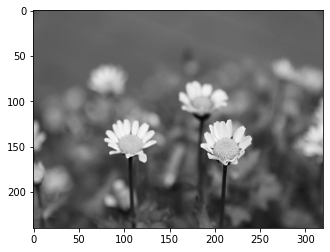

In [26]:
plt.imshow(X_test[0].reshape((240, 320)), cmap='gray')

76800